# Result of Crocus Simulation and Observations from FluxAlp

---

<p align="justify">
A short simulation starting on 17-03-2025 and forced with FluxAlp data was used to compare two percolation schemes. The Bucket scheme is an idealized representation of percolation with low computational complexity, whereas the Richards scheme is more computationally expensive but provides a richer representation of water dynamics, including capillary barriers. However, it has not yet been proven that increasing this complexity leads to a better representation of percolation dynamics in snow.
</p>

---

**Date:** 20/05/2025  
**Written by:** Glenn PITIOT

**Bibliography used:**

**Practical steps:**  
* Load simulation data  
* Compare Bucket and Richards percolation schemes  
* Compare temperature profile evolution from Bucket and Richards schemes with observed temperatures

## Import Libraries


In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

# Snowtools librairie to treat CROCUS simulation data
from snowtools.utils.prosimu import prosimu_auto
from snowtools.utils.prosimu import prosimuAbstract
from snowtools.plots.stratiprofile.profilPlot import saisonProfil

import os
import sys
sys.path.append(os.path.abspath(".."))  # Monte d'un niveau
from utils.load_data import load_PT100_data
from utils.Plot import plot_PT100
from utils.Plot import plot_interpolated_heatmap_PT100
from utils.Plot import plot_obs_vs_BKT_RCH
from utils.Plot import plot_BKTvsRCH

# I.1 Load data.

## I.1CROCUS Sim

In [2]:
# Difinition of file paths
path = "~/private-storage/Data_internship_2025_GP/Crocus/Sim_20250317_BKT_RCH/"
path_BKT = "PRO_2025031706_2025041806_BKT.nc"
path_RCH = "PRO_2025031706_2025041806_RCH.nc"

# Add to curent path simu files
path_BKT = os.path.expanduser(path + path_BKT)
path_RCH = os.path.expanduser(path + path_RCH)

dx = xr.open_dataset(path_BKT,decode_times=False)

## Import variable of interest: 
* 'SNOWDZ' : Thickness of layers
* 'SNOWLIQ' : Liquid water content
* 'SNOWTEMP' : Snow temperature
* 'DSN_T_ISBA' : Snow depth
* 'RUNOFF_ISBA' : Runoff
* 'RSN_VEG' : snow density
* SNOWSSA : SSA

In [3]:
with prosimu_auto(path=path_BKT) as BKT:
    time_BKT= BKT.readtime()
    snow_dph_BKT = BKT.read('DSN_T_ISBA')
    dz_BKT = BKT.read('SNOWDZ', fill2zero=True)
    snowliq_BKT = BKT.read('SNOWLIQ')
    runoff_BKT = BKT.read('RUNOFF_ISBA')
    temp_BKT = BKT.read('SNOWTEMP')
    density_BKT = BKT.read('RSN_VEG')
    ssa_BKT = BKT.read("SNOWSSA")

    
with prosimu_auto(path=path_RCH) as RCH:
    time_RCH= RCH.readtime()
    snow_dph_RCH = RCH.read('DSN_T_ISBA')
    dz_RCH = RCH.read('SNOWDZ', fill2zero=True)
    snowliq_RCH = RCH.read('SNOWLIQ')
    runoff_RCH = RCH.read('RUNOFF_ISBA')
    temp_RCH = RCH.read('SNOWTEMP')
    density_RCH = RCH.read('RSN_VEG')
    ssa_RCH = RCH.read("SNOWSSA")


## I.2 Temperature profile

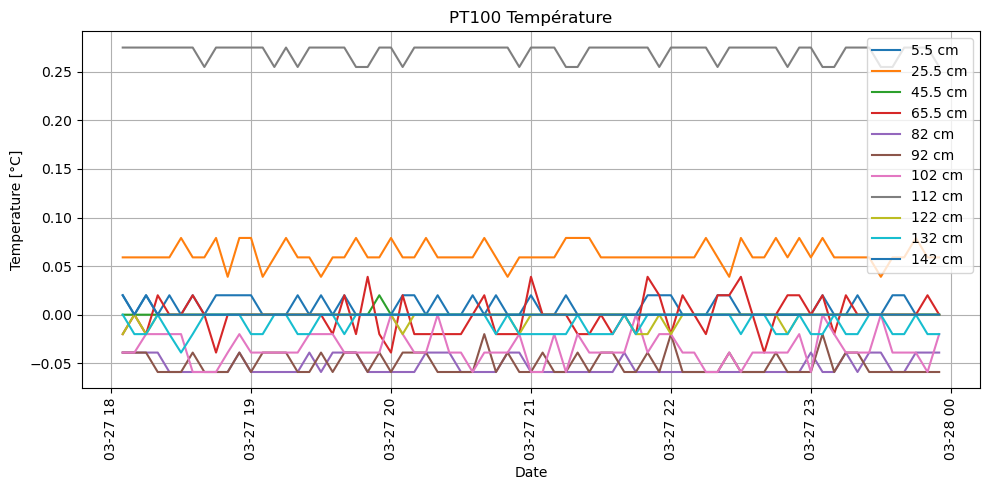

In [4]:
# Open the absolute_path of the file
absolute_path = "~/private-storage/Experiences/Lautaret/Lautaret_2025-04-08/data/"
name_path = "CR1000_Temp_CF.dat"
df_PT100 = load_PT100_data(absolute_path,name_path,"2025-03-10")

# Definition of PT100 position
Dic_PT100 = { 13 : '142 cm',
            12 : '132 cm',
            11  : '122 cm',
            10  : '112 cm',
            9 :'102 cm',
            8 :'92 cm',
            7:'82 cm',
            6:'65.5 cm',
            5:'45.5 cm',
            4:'25.5 cm',
            3:'5.5 cm'}
df_PT100['TIMESTAMP'] =pd.to_datetime(df_PT100['TIMESTAMP'])
plot_PT100(df_PT100,range(3,14), Dic_PT100, date=('2025-03-27 18:00','2025-03-28'))

### Caption:

Temperature evolution of each PT100 sensor when the snow pack is completely thermalised to the melting point.

### Conclusion : 

Temperature needs to be corrected to account for the bias of each PT100 sensor.

In [5]:
# Correction :
for pt100 in range(3,14):
    masque = (df_PT100.TIMESTAMP>'2025-03-27 18:00') & (df_PT100.TIMESTAMP<'2025-03-28')
    df_PT100[f'T({pt100})'] = df_PT100[f'T({pt100})'] - df_PT100.loc[masque,f'T({pt100})'].mean()


# II Comparison Bucket and Richards percolation scheme:



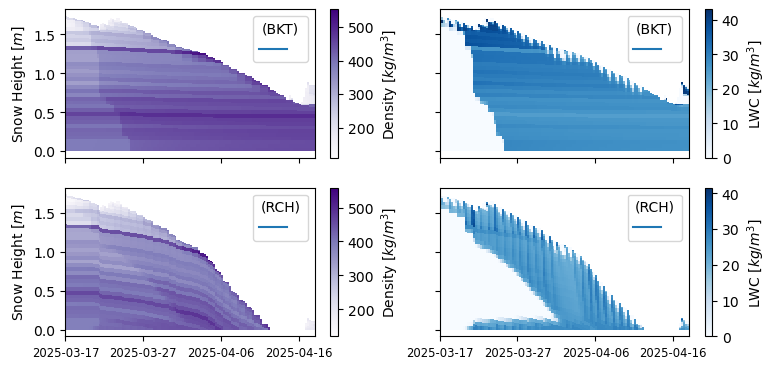

In [6]:
plot_BKTvsRCH(dz_BKT,density_BKT,snowliq_BKT,time_BKT,
                  dz_RCH,density_RCH,snowliq_RCH,time_RCH,
                  )

### Caption :
<p align="justify">
Density and LWC simulated using the Crocus model with the Bucket (BKT)
and Richards (RCH) percolation schemes
</p>

### Conclusion:
<p align="justify">
The Richards percolation scheme leads to earlier snowpack melting
compared to the Bucket scheme at Col du Lautaret. This is likely due to the sequen-
tial treatment of percolation and refreezing, which is handled differently in the two
approaches
</p>

# III Temperature Profile Evolution: Comparison Between Observations and Simulations Using Two Different Percolation Schemes

[ 0. 15. 30. 45. 60.]


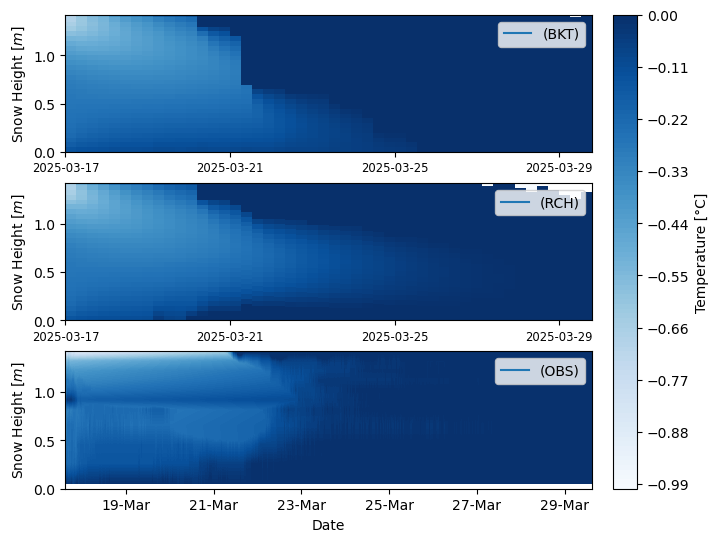

In [7]:
date = ('2025-03-17 15:00','2025-03-29 15:00')
# Convertir les dates de string vers datetime
plot_obs_vs_BKT_RCH(dz_BKT,temp_BKT,time_BKT,
                    dz_RCH,temp_RCH,time_RCH,
                    df_PT100,Dic_PT100,
                    date,
                    vmin=-1,vmax=0)

### Caption
<p align="justify">
Temperature simulated using the Crocus model with the BKT and RCH per-
colation schemes and observed temperatures (OBS) measured by PT100 sensors. The
observations are spatially interpolated between each sensor. Snow depth is scaled from
the ground (0 cm) to 142 cm, which corresponds to the position of the uppermost PT100
sensor.
</p>

### Results
<p align="justify">
Temperature observations show that both the Bucket and Richards
schemes fail to capture the warming of a deep snowpack layer likely caused by
preferential water flow. This highlights the benefit to explicitly represent prefer-
ential flow in percolation schemes. A clear capillary barrier was identified in the
observations but was not reproduced in the simulations, raising questions about
both the ability of the Richards and Bucket scheme to simulate such features and
the role of the model’s initial conditions.
</p>